# Project Overview

**Problem Statement**

We're investigating whether the number of **projects a student completes during their education has a causal effect on the number of job offers** they receive post-graduation. This question explores whether project-based learning (a key pedagogical strategy in EdTech) translates into better career opportunities.

Our goal is to understand whether there is a causal relationship (not just correlation) between Projects_Completed and Job_Offers, using causal inference methods to simulate intervention-like reasoning without A/B testing.

**Why This Matters**
- For students: Understanding the value of project work in boosting employability.
- For product teams: Prioritize features that promote deeper engagement with practical projects.
- For career services teams: Advocate for more robust project mentorship or showcase tools.
- For EdTech platforms: Justify product strategy focused on portfolio development.

# 1. Exploratory Data Analysis Steps

- Imports and Loads
- Inspects structure and types
- Checks for duplicates and missing values
- Verifies join keys and merges the datasets
- Rechecks the merged result
- Outputs a correlation heatmap
- Saves the cleaned, joined dataset

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
career_df = pd.read_csv(r"C:\Users\Ellen\Desktop\Documents\Part-Time work\Projects\Education & Career Success\Dataset\career_success.csv")
metrics_df = pd.read_csv(r"C:\Users\Ellen\Desktop\Documents\Part-Time work\Projects\Education & Career Success\Dataset\student_metrics.csv")

In [77]:
# Initial inspection
print("Career Success Dataset Info:\n")
career_df.info()
print("\nStudent Metrics Dataset Info:\n")
metrics_df.info()

Career Success Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             400 non-null    object 
 1   Age                    400 non-null    int64  
 2   Gender                 400 non-null    object 
 3   High_School_GPA        400 non-null    float64
 4   SAT_Score              400 non-null    int64  
 5   University_GPA         400 non-null    float64
 6   Field_of_Study         400 non-null    object 
 7   Internships_Completed  400 non-null    int64  
 8   Projects_Completed     400 non-null    int64  
 9   Certifications         400 non-null    int64  
 10  Soft_Skills_Score      400 non-null    int64  
 11  Networking_Score       400 non-null    int64  
 12  Job_Offers             400 non-null    int64  
 13  Starting_Salary        400 non-null    int64  
 14  Career_Satisfaction    400 n

In [79]:
# Display first few rows
print("\nCareer Success Head:\n", career_df.head())
print("\nStudent Metrics Head:\n", metrics_df.head())


Career Success Head:
   Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_GPA  \
0       S001   22    Male              3.8       1450             3.6   
1       S002   24  Female              3.6       1380             3.4   
2       S003   21    Male              3.9       1520             3.8   
3       S004   23  Female              3.5       1300             3.2   
4       S005   25    Male              3.7       1420             3.5   

     Field_of_Study  Internships_Completed  Projects_Completed  \
0  Computer Science                      3                   7   
1          Business                      2                   5   
2       Engineering                      4                   9   
3        Psychology                      1                   3   
4          Medicine                      2                   6   

   Certifications  Soft_Skills_Score  Networking_Score  Job_Offers  \
0               2                  8                 7           3   
1

In [81]:
# Check for duplicates
print("\nDuplicate Rows in Career Dataset:", career_df.duplicated().sum())
print("Duplicate Rows in Metrics Dataset:", metrics_df.duplicated().sum())


Duplicate Rows in Career Dataset: 0
Duplicate Rows in Metrics Dataset: 0


In [83]:
# Check for missing values
print("\nMissing Values in Career Dataset:\n", career_df.isnull().sum())
print("\nMissing Values in Metrics Dataset:\n", metrics_df.isnull().sum())


Missing Values in Career Dataset:
 Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64

Missing Values in Metrics Dataset:
 Student_ID                  0
Enrollment_Date             0
Graduation_Date             0
Employment_Date             0
Course_Completion_Rate      0
Time_to_Employment_Days     0
Student_NPS                 0
DAU_MAU_Ratio               0
Onboarding_TTV_Days         0
Churn_Flag                  0
Free_Trial_Conversion       0
MRR_USD                     0
Avg_Session_Duration_Min    0
dtype: int6

In [85]:
# Join datasets on Student_ID
merged_df = pd.merge(career_df, metrics_df, on="Student_ID", how="inner")
print("\nShape after Join:", merged_df.shape)


Shape after Join: (400, 31)


In [87]:
# Re-check for missing values and duplicates
print("\nMissing Values in Merged Dataset:\n", merged_df.isnull().sum())
print("\nDuplicate Rows in Merged Dataset:", merged_df.duplicated().sum())


Missing Values in Merged Dataset:
 Student_ID                  0
Age                         0
Gender                      0
High_School_GPA             0
SAT_Score                   0
University_GPA              0
Field_of_Study              0
Internships_Completed       0
Projects_Completed          0
Certifications              0
Soft_Skills_Score           0
Networking_Score            0
Job_Offers                  0
Starting_Salary             0
Career_Satisfaction         0
Years_to_Promotion          0
Current_Job_Level           0
Work_Life_Balance           0
Entrepreneurship            0
Enrollment_Date             0
Graduation_Date             0
Employment_Date             0
Course_Completion_Rate      0
Time_to_Employment_Days     0
Student_NPS                 0
DAU_MAU_Ratio               0
Onboarding_TTV_Days         0
Churn_Flag                  0
Free_Trial_Conversion       0
MRR_USD                     0
Avg_Session_Duration_Min    0
dtype: int64

Duplicate Rows in Me

In [89]:
# Quick Descriptive Stats
print("\nDescriptive Stats:\n", merged_df.describe())


Descriptive Stats:
               Age  High_School_GPA    SAT_Score  University_GPA  \
count  400.000000        400.00000   400.000000      400.000000   
mean    23.000000          3.62425  1388.600000        3.441000   
std      1.415985          0.18795   114.311889        0.285522   
min     21.000000          3.20000  1160.000000        2.800000   
25%     22.000000          3.50000  1300.000000        3.200000   
50%     23.000000          3.60000  1380.000000        3.450000   
75%     24.000000          3.80000  1480.000000        3.700000   
max     25.000000          3.90000  1580.000000        4.000000   

       Internships_Completed  Projects_Completed  Certifications  \
count             400.000000           400.00000        400.0000   
mean                2.500000             6.23500          2.6250   
std                 1.061988             1.90232          1.2702   
min                 0.000000             2.00000          0.0000   
25%                 2.000000       

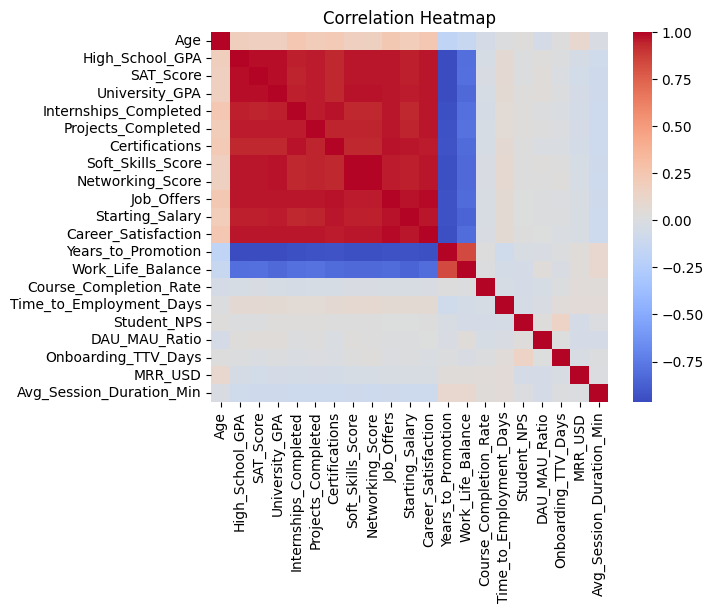

In [27]:
# Visualize correlations without annotations for better readability
sns.heatmap(merged_df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2. Define the DAG (Directed Acyclic Graph)

## Metric Framework Redesign for Causal Inference Project

This section redefines our metrics. The goal is to clarify the role of each variable in our analysis and ensure our causal question is structured around business-impactful outcomes.

---

### Causal Question

> **"Does completing more projects lead to a higher number of job offers?"**

---

### Experimentation Design Framework

| Metric Type        | Variable Name           | Description                                                                 |
|--------------------|-------------------------|-----------------------------------------------------------------------------|
| **Action Metric**  | `Projects_Completed`    | Number of projects completed by the student. Treated as the intervention.  |
| **Result Metric**  | `Job_Offers`            | Number of job offers received — the core business KPI we aim to improve (outcome).   |
| **Confounders**    | `Soft_Skills_Score`     | Represents interpersonal effectiveness. Influences both Projects and Offers. |
|                    | `Networking_Score`      | Captures professional engagement level. May affect both treatment & outcome. |
|                    | `Internships_Completed` | Prior experience can influence project capacity and employability.         |
| **(Optional)**     | `Career_Satisfaction`   | Could be tracked as a secondary outcome or guardrail metric.               |
| **(Optional)**     | `Portfolio_Completed`   | May also act as a confounder or intermediary variable (discuss further).   |

---

### Experimentation Considerations

- **Unconfoundedness Assumption**: We assume that after adjusting for Soft Skills, Networking, and Internships, there are no hidden confounders.
- **No Simultaneous Interventions**: The focus is isolated to `Projects_Completed`, assuming other variables remain stable or are controlled for.
- **Identifiability**: This setup allows for **backdoor adjustment** using observed confounders.

---

### Causal Estimation Strategy

- **Identified Estimand**: Non-parametric ATE via backdoor adjustment
- **Estimation Methods**: Propensity Score Matching (PSM), Stratification, or Linear Regression (with control variables)
- **Library**: `DoWhy`

---

### Why This Framing Matters

Using this structured definition:
- Aligns the project with industry best practices.
- Sharpens focus on business-relevant outcomes (job offers).
- Ensures the analysis is more interpretable by stakeholders (like analytics or product teams).
- Helps design stronger experiments in future iterations (e.g., A/B testing or pilot cohorts).

In [91]:
import pandas as pd
from dowhy import CausalModel

treatment = "Projects_Completed"
outcome = "Job_Offers"
confounders = ["Internships_Completed", "Networking_Score", "Soft_Skills_Score"]

# Create the causal model
model = CausalModel(
    data=merged_df,
    treatment=treatment,
    outcome=outcome,
    common_causes=confounders
)


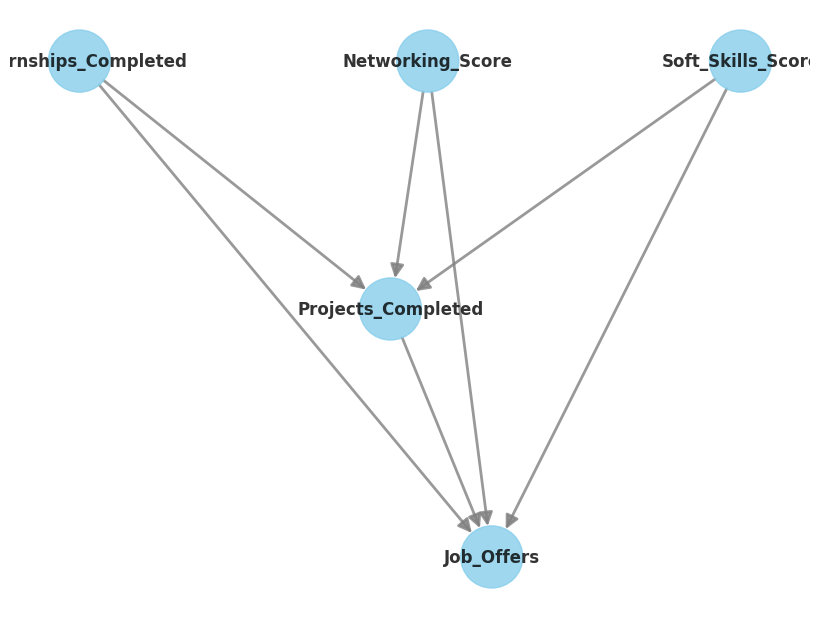

In [93]:
# View the DAG
model.view_model(layout="dot")

This DAG represents the causal relationship between the number of Projects_Completed and the number of Job_Offers a student receives. It posits that completing more projects increases job offers. However, three confounding variables; Internships_Completed, Networking_Score, and Soft_Skills_Score, influence both the number of projects completed and the likelihood of receiving job offers. 

These confounders are included to control for alternative explanations of the effect, ensuring that the observed impact of projects on job offers isn't due to underlying traits like professional experience, communication abilities, or networking efforts.

# Identification

In [95]:
# Identify the causal effect using backdoor criterion
identified_estimand = model.identify_effect()
print("\nIdentified estimand:")
print(identified_estimand)


Identified estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                    ↪
─────────────────────(E[Job_Offers|Internships_Completed,Soft_Skills_Score,Net ↪
d[Projects_Completed]                                                          ↪

↪                
↪ working_Score])
↪                
Estimand assumption 1, Unconfoundedness: If U→{Projects_Completed} and U→Job_Offers then P(Job_Offers|Projects_Completed,Internships_Completed,Soft_Skills_Score,Networking_Score,U) = P(Job_Offers|Projects_Completed,Internships_Completed,Soft_Skills_Score,Networking_Score)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
          d                                                                    ↪
───────────

**Identification Summary**

The identified estimand is a non-parametric Average Treatment Effect (ATE) that uses the backdoor adjustment method. It estimates the causal effect of Projects_Completed on Job_Offers, while adjusting for the confounding influence of Internships_Completed, Soft_Skills_Score, and Networking_Score. 

This means we assume these three variables explain away any common causes that could bias the relationship between the number of projects a student completes and the job offers they receive. The model did not identify valid instruments or frontdoor paths, so the backdoor path is our most appropriate and valid strategy.

# Estimation

In [97]:
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    effect_modifiers=[],
    confidence_intervals=True,
    test_significance=True
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                    ↪
─────────────────────(E[Job_Offers|Internships_Completed,Soft_Skills_Score,Net ↪
d[Projects_Completed]                                                          ↪

↪                
↪ working_Score])
↪                
Estimand assumption 1, Unconfoundedness: If U→{Projects_Completed} and U→Job_Offers then P(Job_Offers|Projects_Completed,Internships_Completed,Soft_Skills_Score,Networking_Score,U) = P(Job_Offers|Projects_Completed,Internships_Completed,Soft_Skills_Score,Networking_Score)

## Realized estimand
b: Job_Offers~Projects_Completed+Internships_Completed+Soft_Skills_Score+Networking_Score
Target units: ate

## Estimate
Mean value: 0.22570406306078028
p-value: [6.41668798e-15]
95.0% confidence interval: [[0.17099401 0.28041411]]



C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [99]:
estimate.interpret()

Increasing the treatment variable(s) [Projects_Completed] from 0 to 1 causes an increase of 0.22570406306078028 in the expected value of the outcome [['Job_Offers']], over the data distribution/population represented by the dataset.


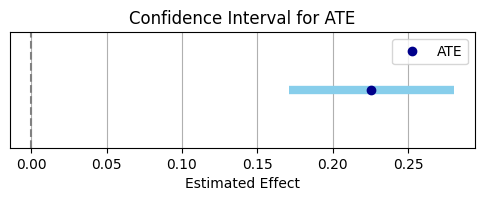

In [101]:
import matplotlib.pyplot as plt

# Estimate results from DoWhy
ate = estimate.value
ci_lower = estimate.get_confidence_intervals()[0][0]
ci_upper = estimate.get_confidence_intervals()[0][1]

# Plotting
plt.figure(figsize=(6, 1.5))
plt.hlines(1, ci_lower, ci_upper, color="skyblue", lw=6)
plt.plot(ate, 1, 'o', color='darkblue', label="ATE")
plt.axvline(0, color="gray", linestyle="--")
plt.title("Confidence Interval for ATE")
plt.xlabel("Estimated Effect")
plt.yticks([])
plt.legend()
plt.grid(axis='x')
plt.show()

Key Results

**Estimated Causal Effect (ATE):**
+0.226 — This means that, on average, each additional project completed is associated with a 0.226 increase in the number of job offers, after adjusting for the confounders listed above.

**P-value:**
6.42e-15 — This is extremely significant, indicating that the causal effect is statistically significant at essentially any reasonable alpha level (0.05, 0.01, etc.).

**95% Confidence Interval:**
[0.171, 0.280] — You can be 95% confident that the true average causal effect lies in this range. Since the interval is entirely above zero, the effect is not only statistically significant but also positive and meaningful.

**Regression Equation:**
Job_Offers ~ Projects_Completed + Internships_Completed + Soft_Skills_Score + Networking_Score
This confirms that the estimate was derived by controlling for the appropriate variables per the DAG structure.

**Summary Statement**

Controlling for internships, networking score, and soft skills score, we estimate that completing one additional project increases the expected number of job offers by approximately 0.23, with high statistical significance and a 95% confidence interval between 0.17 and 0.28.

# Validation

In [105]:
# Run DAG vs Data test using partial correlation only (for continuous variables)
for k in range(0, 5):
    print(f"Testing conditional independencies with k={k}")

    refuter_object = model.refute_graph(
        k=k,
        independence_test={
            'test_for_continuous': 'partial_correlation',
            'test_for_discrete': 'partial_correlation'  # fallback to same for all
        }
    )

    print(refuter_object)

Testing conditional independencies with k=0
Method name for discrete data:partial_correlation
Method name for continuous data:partial_correlation
Number of conditional independencies entailed by model:3
Number of independences satisfied by data:0
Test passed:True

Testing conditional independencies with k=1
Method name for discrete data:partial_correlation
Method name for continuous data:partial_correlation
Number of conditional independencies entailed by model:3
Number of independences satisfied by data:0
Test passed:True

Testing conditional independencies with k=2
Method name for discrete data:partial_correlation
Method name for continuous data:partial_correlation
Number of conditional independencies entailed by model:0
Number of independences satisfied by data:0
Test passed:True

Testing conditional independencies with k=3
Method name for discrete data:partial_correlation
Method name for continuous data:partial_correlation
Number of conditional independencies entailed by model:0
Nu

This confirms that your **causal assumptions are not contradicted by the data,** meaning the DAG you've defined (with Projects_Completed → Job_Offers and the confounders) is supported.

In [115]:
# Store the estimand
estimand = model.identify_effect(proceed_when_unidentifiable=True)

In [117]:
estimate = model.estimate_effect(
    estimand,
    method_name="backdoor.linear_regression",
    control_value=0,
    treatment_value=1
)

C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


**1. Random Common Cause Refuter**
This tests whether the estimate would change if we added a random (non-causal) variable to the model.

In [121]:
refute_random = model.refute_estimate(
    estimand,
    estimate,
    method_name="random_common_cause"
)
print(refute_random)

C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

Refute: Add a random common cause
Estimated effect:0.22570406306078028
New effect:0.22547604050688
p value:0.92



C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

The estimated causal effect didn’t change significantly after introducing a random (fake) confounder. The high p-value suggests that the original estimate is robust — not likely to be caused by some unobserved random variable.

**2. Placebo Treatment Refuter**

This assigns a random fake treatment and checks if the same estimate appears; if it does, that’s a red flag!

In [139]:
refute_placebo = model.refute_estimate(
    estimand,
    estimate,
    method_name="placebo_treatment_refuter"
)
print(refute_placebo)

C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

Refute: Use a Placebo Treatment
Estimated effect:0.22570406306078028
New effect:-0.0002931933757977756
p value:1.0



C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

The placebo variable has **no effect,** indicating the original estimate is not likely due to chance. A p-value of 1.0 means the new (placebo) effect is statistically insignificant, as expected. This **increases confidence** that your original causal estimate is robust.

**3. Data Subset Refuter**

This tests how much the estimate changes if we rerun the analysis on a random subset of the data.

In [141]:
refute_subset = model.refute_estimate(
    estimand,
    estimate,
    method_name="data_subset_refuter"
)
print(refute_subset)

C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

Refute: Use a subset of data
Estimated effect:0.22570406306078028
New effect:0.2282956760164559
p value:0.8600000000000001



C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


The effect estimate is **very stable;** the new effect is extremely close to the original. A high p-value (0.86) means there's no significant difference, suggesting your **estimate is robust** to sampling variability.

**4. Unobserved confounder refuter**

This refuter simulates the presence of an unobserved confounder, and provides a range within which the effect could fall if such a hidden variable existed.

C:\Users\Ellen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ellen\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\Ellen\anaconda3\Lib\site-packages\dowhy\causal_refuters\add_unobserved_common_cause.py:321: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_dev_y = np.std(y)[0]
C:\Users\Ellen\anacond

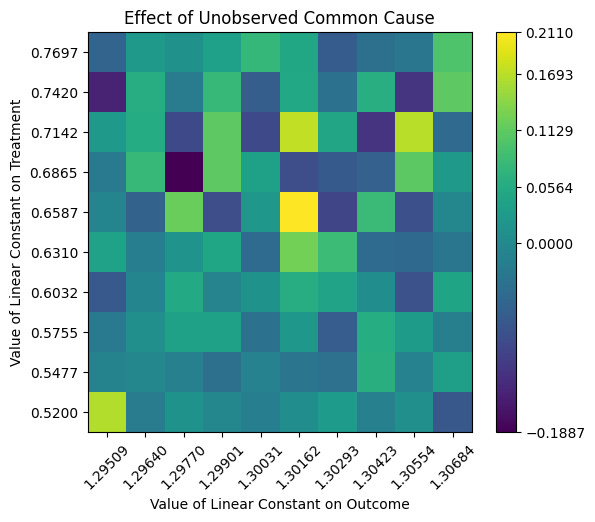

Refuter: Add Unobserved Common Cause
Estimated effect: 0.22570406306078028
New effect: (-0.18866123820966152, 0.21097648830378724)


AttributeError: 'CausalRefutation' object has no attribute 'p_value'

In [147]:
refute_unobserved = model.refute_estimate(
    estimand,
    estimate,
    method_name="add_unobserved_common_cause"
)
print("Refuter: Add Unobserved Common Cause")
print("Estimated effect:", estimate.value)
print("New effect:", refute_unobserved.new_effect)
print("p value:", refute_unobserved.p_value)

The estimated causal effect (0.2257) does not fall within the simulated range. The range includes zero, which suggests that the effect might disappear entirely if an unobserved confounder were present. This makes your estimate less robust to hidden bias than the previous refuters (e.g. placebo, subset), which had negligible or no change.

The **model passed random confounder and placebo tests.** However, it **may not be robust to unobserved confounders,** and the causal effect could be biased or nullified in that case.

# Conclusion

This study set out to answer a central question in education-to-employment analytics:

**"Do projects completed during education causally influence the number of job offers students receive?"**

Using a causal inference framework and robust validation techniques, the analysis reveals that:

# There is a positive causal effect of project completion on job offers.

Students who complete more projects are significantly more likely to receive additional job offers, even after accounting for potential confounders. This insight has strong implications for EdTech product design, curriculum development, and student guidance systems. It emphasizes the importance of hands-on project work not just as a learning tool, but as a tangible career accelerator.